## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

#### Now you are ready to start!

In [2]:
#PART 1
import math

In [3]:
#Task 1: If...Else statement to test whether a number is divisible by three

x = 9
if x % 3 == 0:
    print(str(x) + " is divisible by 3")
else :
    print(str(x) + " is not divisible by 3")

9 is divisible by 3


In [4]:
#Task 2: If...Else statement to test whether a type of frui is in a list of acceptable fruits

x= "banana"
lst1 = ["Apple", "Orange", "Pear", "Kiwi", "Strawberry"]

if x in lst1:
    print(str(x) + " is acceptable")
else:
    print(str(x) + " is not acceptable")

banana is not acceptable


In [42]:
# task 3 Create a function to calculate the distance between two coordinates using the haversine formula.
import math 

# Lands End coordinates
lst1 = [50.065, 5.7132]

# John o' Groats coordinates
lst2 = [58.6373, 3.0689]

R = 6371

latA = math.radians(lst1[0]) 
lonA = math.radians(lst1[1])
latB = math.radians(lst2[0])
lonB = math.radians(lst2[1])

a = math.sin((latB - latA) / 2)**2 + math.cos(latA) * math.cos(latB) * math.sin((lonB - lonA) / 2)**2
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
d = R * c

print(d)

968.2827485977849


In [6]:
#PART 2
# First we need to import the needed libraries Panda and NumPy
import pandas as pd
import numpy as np

In [7]:
# next, load the data for Portland trees
portland_park_trees = pd.read_csv("/arcgis/home/portland_park_trees.csv")
print (portland_park_trees)

         fid  OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  \
0          1       426  2017/05/09    PSME  37.4      Fair       105.0   
1          2       427  2017/05/09    PSME  32.5      Fair        94.0   
2          3       428  2017/05/09    CRLA   9.7      Fair        23.0   
3          4       429  2017/05/09    QURU  10.3      Poor        28.0   
4          5       430  2017/05/09    PSME  33.2      Fair       102.0   
...      ...       ...         ...     ...   ...       ...         ...   
25529  25530    726046  2018/08/16    QURU  31.6      Fair        74.0   
25530  25531    726443  2019/10/11    PSME   0.4      Good         8.0   
25531  25532    726444  2019/10/11    MEGL  26.3      Fair        79.0   
25532  25533    726445  2019/10/11    PCSI   8.8      Fair        43.0   
25533  25534    726446  2019/10/11    COKO   2.0      Good        18.0   

       CrownWidth  CrownWid_1 CollectedB  ...        Genus        Common_nam  \
0            44.0        57.0  

In [8]:
# Question 1 :  How many trees are of the Quercus or Acer genus?
acer_quercus_trees = portland_park_trees.query("Genus in ['Acer', 'Quercus']")
total_trees =len(acer_quercus_trees)
print(total_trees)

5675


In [9]:
# Question 2: Count the trees in the Quercus or Acer genus with DBH > 50 inches
DHB_trees = len(acer_quercus_trees.query("DBH > 50"))

print(DHB_trees)

124


In [41]:
# Question 3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?
tree_genus = ['Quercus', 'Acer', 'Fraxinus']

filtered_tree_genus = portland_park_trees[portland_park_trees['Genus'].isin(tree_genus)]

mean_dbh_by_genus = filtered_tree_genus.groupby('Genus')['DBH'].mean()

print(mean_dbh_by_genus)

Genus
Acer        18.419085
Fraxinus    11.033610
Quercus     23.568238
Name: DBH, dtype: float64


In [11]:
#Q4: How many different species of trees are recorded in the Acer genus? 

acer_trees = portland_park_trees[portland_park_trees['Genus'] == 'Acer']

unique_acer_species = acer_trees['Species'].unique()

num_acer_species = len(unique_acer_species)

print(num_acer_species)

20


In [12]:
#Q5
#load and read the cities data
World_cities = pd.read_csv("/arcgis/home/world_cities.csv")
print (World_cities)

                     city       country     pop    lat    lon  capital
0      'Abasan al-Jadidah     Palestine    5629  31.31  34.34        0
1      'Abasan al-Kabirah     Palestine   18999  31.32  34.35        0
2            'Abdul Hakim      Pakistan   47788  30.55  72.11        0
3      'Abdullah-as-Salam        Kuwait   21817  29.36  47.98        0
4                   'Abud     Palestine    2456  32.03  35.07        0
...                   ...           ...     ...    ...    ...      ...
43640           az-Zubayr          Iraq  124611  30.39  47.71        0
43641            az-Zulfi  Saudi Arabia   54070  26.30  44.80        0
43642       az-Zuwaytinah         Libya   21984  30.95  20.12        0
43643        s-Gravenhage   Netherlands  479525  52.07   4.30        0
43644     s-Hertogenbosch   Netherlands  135529  51.68   5.30        0

[43645 rows x 6 columns]


In [13]:
# Create the new "pop_M" column by multipling the "pop" column by 1,000,000
World_cities['pop_M'] = World_cities['pop'] / 1000000

print(World_cities)

                     city       country     pop    lat    lon  capital  \
0      'Abasan al-Jadidah     Palestine    5629  31.31  34.34        0   
1      'Abasan al-Kabirah     Palestine   18999  31.32  34.35        0   
2            'Abdul Hakim      Pakistan   47788  30.55  72.11        0   
3      'Abdullah-as-Salam        Kuwait   21817  29.36  47.98        0   
4                   'Abud     Palestine    2456  32.03  35.07        0   
...                   ...           ...     ...    ...    ...      ...   
43640           az-Zubayr          Iraq  124611  30.39  47.71        0   
43641            az-Zulfi  Saudi Arabia   54070  26.30  44.80        0   
43642       az-Zuwaytinah         Libya   21984  30.95  20.12        0   
43643        s-Gravenhage   Netherlands  479525  52.07   4.30        0   
43644     s-Hertogenbosch   Netherlands  135529  51.68   5.30        0   

          pop_M  
0      0.005629  
1      0.018999  
2      0.047788  
3      0.021817  
4      0.002456  
...

In [14]:
# Removing the pop column
Cities_drop = World_cities.drop("pop", axis = 1)
print(Cities_drop)

                     city       country    lat    lon  capital     pop_M
0      'Abasan al-Jadidah     Palestine  31.31  34.34        0  0.005629
1      'Abasan al-Kabirah     Palestine  31.32  34.35        0  0.018999
2            'Abdul Hakim      Pakistan  30.55  72.11        0  0.047788
3      'Abdullah-as-Salam        Kuwait  29.36  47.98        0  0.021817
4                   'Abud     Palestine  32.03  35.07        0  0.002456
...                   ...           ...    ...    ...      ...       ...
43640           az-Zubayr          Iraq  30.39  47.71        0  0.124611
43641            az-Zulfi  Saudi Arabia  26.30  44.80        0  0.054070
43642       az-Zuwaytinah         Libya  30.95  20.12        0  0.021984
43643        s-Gravenhage   Netherlands  52.07   4.30        0  0.479525
43644     s-Hertogenbosch   Netherlands  51.68   5.30        0  0.135529

[43645 rows x 6 columns]


In [15]:
#subset the World_cities DataFrame for the city of Prague
Selected_city = World_cities.loc[World_cities['city'] == 'Prague']

print(Selected_city)

         city         country      pop    lat    lon  capital     pop_M
29775  Prague  Czech Republic  1168374  50.08  14.43        1  1.168374


In [16]:
#Find the five biggest cities in Czechoslovakia
prague_country = World_cities.loc[World_cities['city'] == 'Prague', 'country'].iloc[0]


same_country_cities = World_cities[World_cities['country'] == prague_country]


sorted_cities = same_country_cities.sort_values(by='pop', ascending=False)


five_biggest_cities = sorted_cities.head(5)


print(five_biggest_cities)

          city         country      pop    lat    lon  capital     pop_M
29775   Prague  Czech Republic  1168374  50.08  14.43        1  1.168374
5405      Brno  Czech Republic   365771  49.20  16.61        0  0.365771
27496  Ostrava  Czech Republic   311013  49.83  18.27        0  0.311013
29257    Plzen  Czech Republic   163717  49.75  13.37        0  0.163717
27109  Olomouc  Czech Republic   100683  49.61  17.25        0  0.100683


In [17]:
#Part 3: Python Data Visualization 
#import libraries
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]
import seaborn as sns  

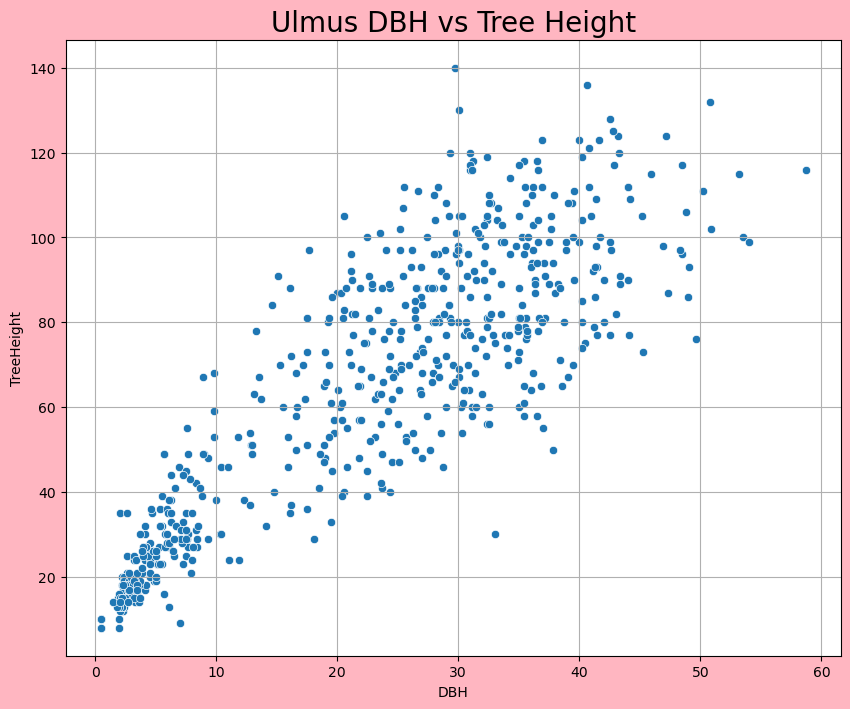

In [18]:
#Graph 1 scatterplot for just trees in the Ulmus genus
ulmus_trees = portland_park_trees[portland_park_trees["Genus"] == 'Ulmus'] 
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x="DBH", y="TreeHeight", data=ulmus_trees)
axs.set_title("Ulmus DBH vs Tree Height", fontsize=20, color="#000000")  
axs.grid(True)
fig.patch.set_facecolor('lightpink')  
plt.show()

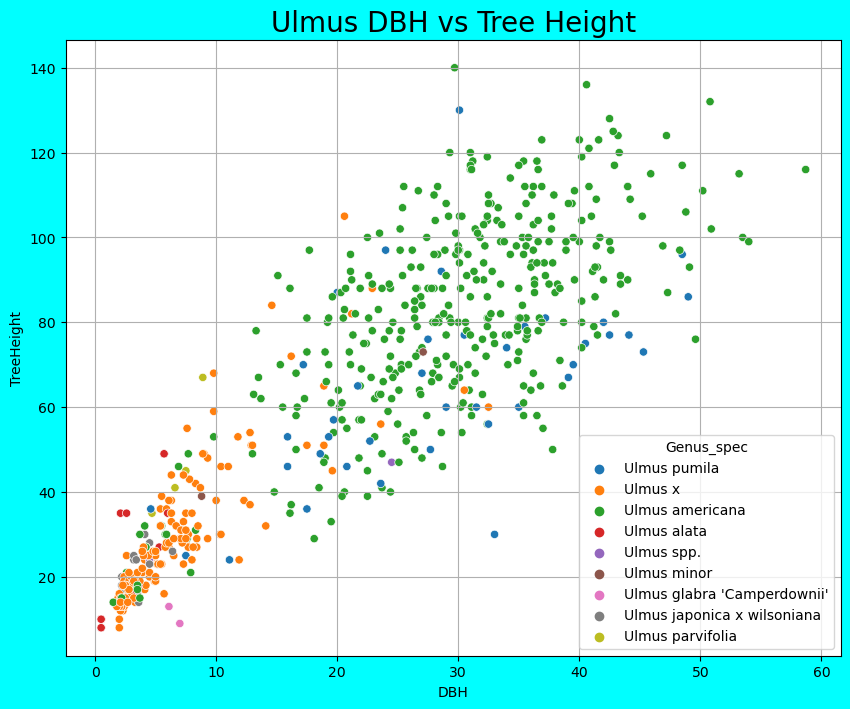

In [19]:
#Graph 2: scatterplot for just trees in the Ulmus genus with DBH
ulmus_trees = portland_park_trees[portland_park_trees["Genus"] == 'Ulmus'] #come back to this
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x="DBH", y="TreeHeight", hue="Genus_spec", data=ulmus_trees)
axs.set_title("Ulmus DBH vs Tree Height", fontsize=20, color="#000000")  
axs.grid(True)
fig.patch.set_facecolor('aqua')  
plt.show() 

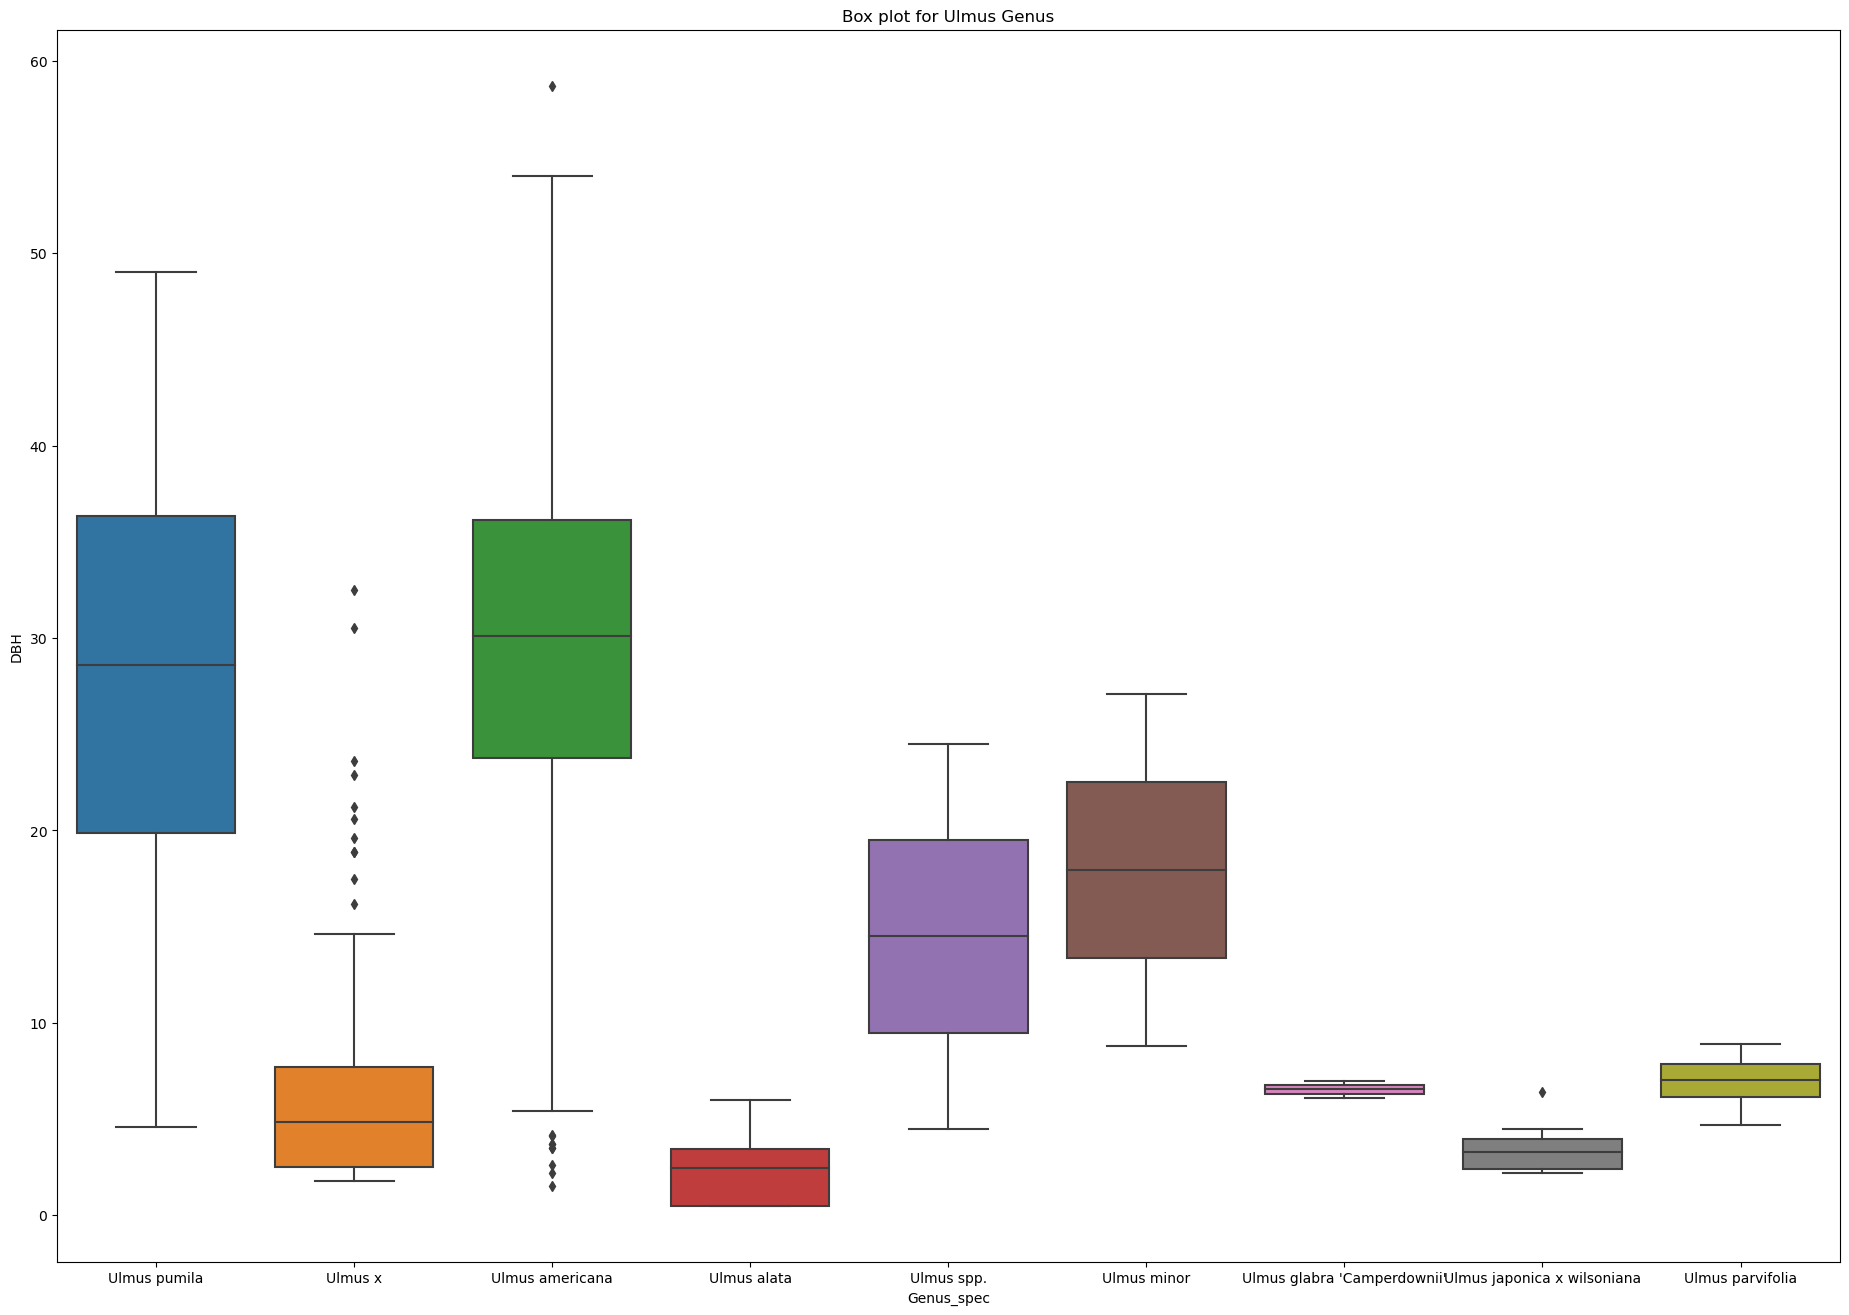

In [20]:
# Graph 3: Create a boxplot of DBH for just the Ulmus genus differentiated by species 
plt.figure(figsize=(23,16))
sns.boxplot(data=ulmus_trees, x='Genus_spec', y='DBH')
plt.title ('Box plot for Ulmus Genus')
plt.show()

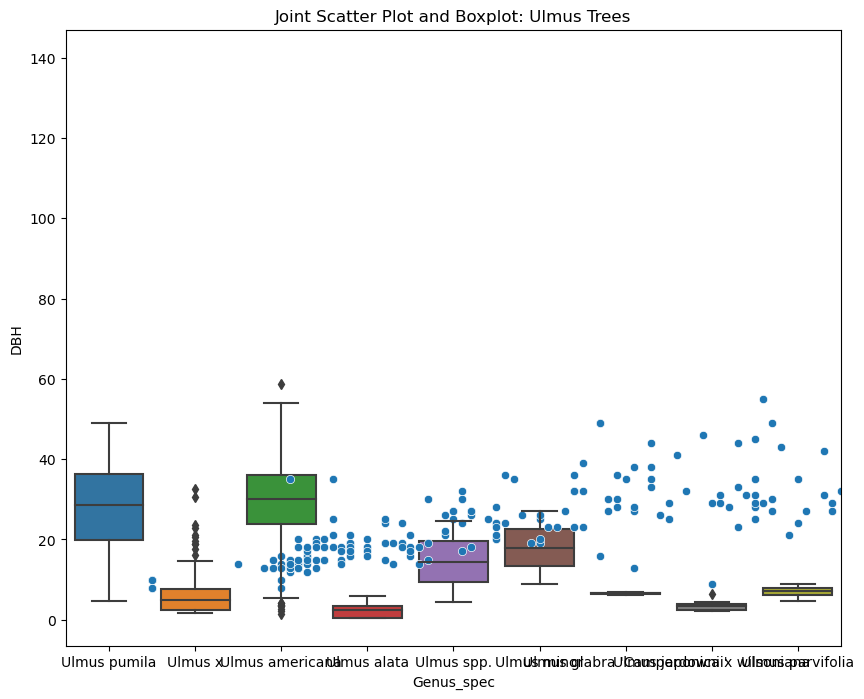

In [21]:
#Task 3:Combine Graphs 1 and 3 into a single figure
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(data=ulmus_trees, x='DBH', y='TreeHeight', ax=ax)

sns.boxplot(data=ulmus_trees, x='Genus_spec', y='DBH', ax=ax)

ax.set_title('Joint Scatter Plot and Boxplot: Ulmus Trees')

plt.show()


In [ ]:
#Part 4: Python GeoPandas

In [22]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyproj from https://files.pythonhosted.org/packages/97/0a/b1525be9680369cc06dd288e12c59d24d5798b4afcdcf1b0915836e1caa6/pyproj-3.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/83/35/562e72099bf50228fa2a8e161db35a94090f3939cb73aa54e385096ca3ff/contextily-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for mapclassify from https://files.pythonhosted.org/packages/3f/f1/8db36df379703311c16e5341b408dad04e34cfded66f38e351

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<AxesSubplot: >

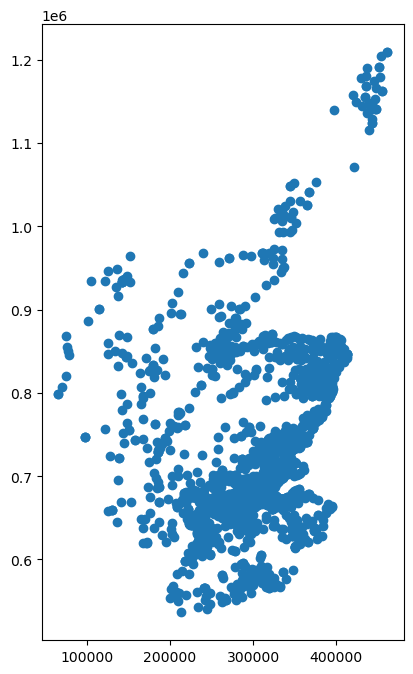

In [24]:
#task 1
Schools =gpd.read_file('/arcgis/home/SG_SchoolRoll_2022.shp')
Schools.plot()

<AxesSubplot: >

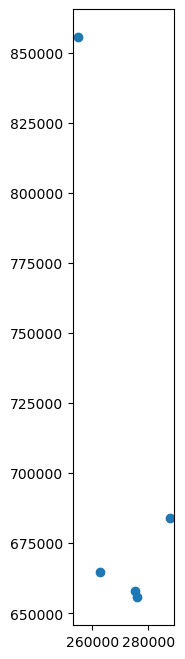

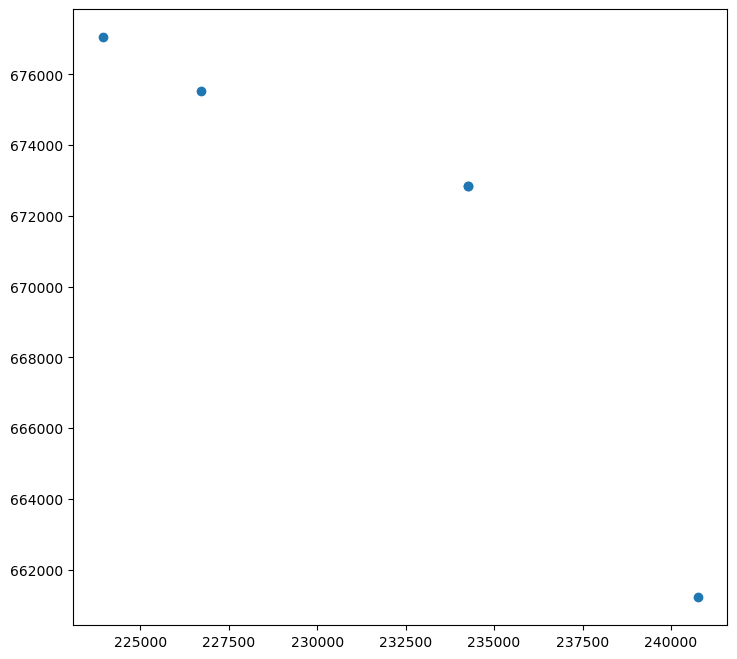

In [25]:
#task 2: plot the first 5 and the last 5 sets of record
First_5 = Schools.head(5) 
First_5.plot()

last_5 = Schools.tail(5)
last_5.plot()

In [26]:
import folium
from folium import plugins


In [27]:
#Task 3: Create a map where you can explore the selected dataset
Schools.explore(column= 'SchoolType', cmap='viridis')

In [28]:
#Task 4 find the coordinate system
crs= Schools.crs
print(crs)

epsg:27700


In [29]:
#Task 5 find the number of features in my dataset
num_features = len(Schools)
print(num_features)

2487


In [30]:
#task 6


In [35]:
#task 7








In [79]:
#task 8

In [31]:
pip install earthpy rasterio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.plot import show_hist
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

In [33]:
Elevation = rio.open('/arcgis/home/elev.tif')
print(Elevation.crs)


EPSG:32617


In [34]:
bounds = Elevation.bounds
crs = Elevation.crs
num_bands = Elevation.count
print(bounds)
print(crs)
print(num_bands)

BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
EPSG:32617
1


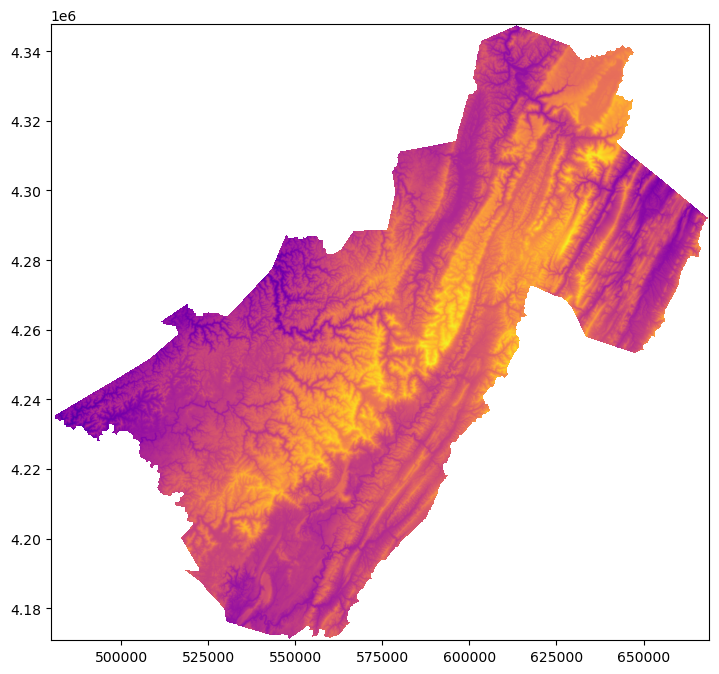

In [35]:
plt.rcParams['figure.figsize'] = [10, 8]
show(Elevation, cmap="plasma")
plt.show()

In [36]:
#Task 5 Create Histograms from the raster.

In [37]:
pip install earthpy

Note: you may need to restart the kernel to use updated packages.


In [38]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [ ]:
ep.hist(Elevation)

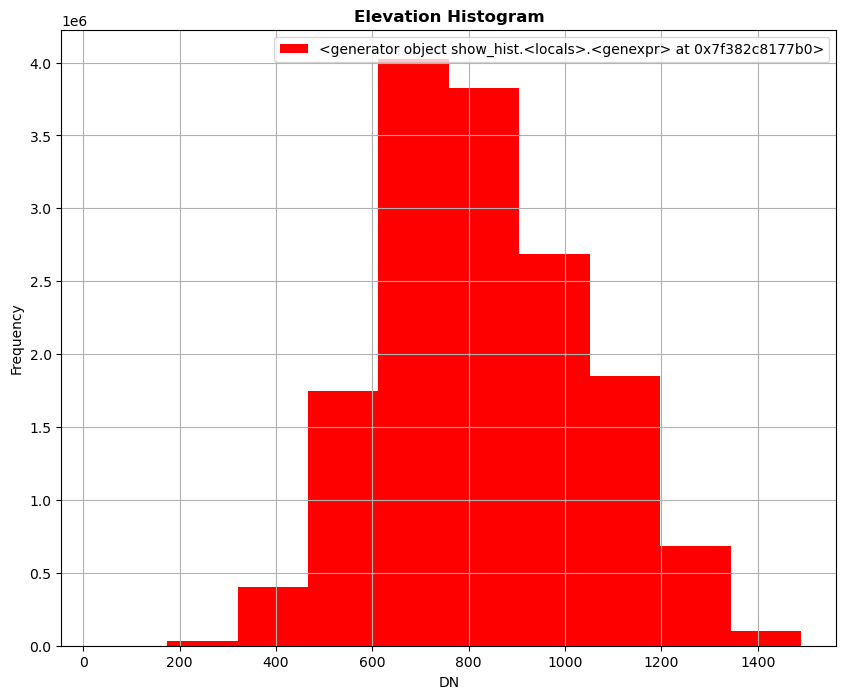

In [39]:
plt.figure(figsize=(10,8))
show_hist(Elevation, title="Elevation Histogram")
plt.show()